# Intro to DL on the DevCloud

In [1]:
# Make sure we're running TensorFlow 1.9
!pip install --user tensorflow==1.9.0

  Using cached https://files.pythonhosted.org/packages/86/95/274190b39950e1e9eef4b071acefea832ac3e2c19bb4b442fa54f3214d2e/tensorflow-1.9.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/9e/1f/3da43860db614e294a034e42d4be5c8f7f0d2c75dc1c428c541116d8cdab/tensorboard-1.9.0-py3-none-any.whl
scikit-image 0.13.0 requires networkx>=1.8, which is not installed.
scikit-image 0.13.0 requires pillow>=2.1.0, which is not installed.
scikit-image 0.13.0 requires PyWavelets>=0.4.0, which is not installed.
bokeh 0.12.7 requires Jinja2>=2.7, which is not installed.
bokeh 0.12.7 requires tornado>=4.3, which is not installed.
  Found existing installation: tensorboard 1.7.0
    Uninstalling tensorboard-1.7.0:
      Successfully uninstalled tensorboard-1.7.0
  Found existing installation: tensorflow 1.7.0
    Uninstalling tensorflow-1.7.0:
      Successfully uninstalled tensorflow-1.7.0
You are using pip version 10.0.1, however version 19.0.3 is available.
You shou

In [2]:
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


Using TensorFlow backend.


In [3]:
#defining our callback to stop when we get great accuracy
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.998):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()


In [13]:
#Load our Data into Two Groups, Training and Validation
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

<IPython.core.display.Javascript object>


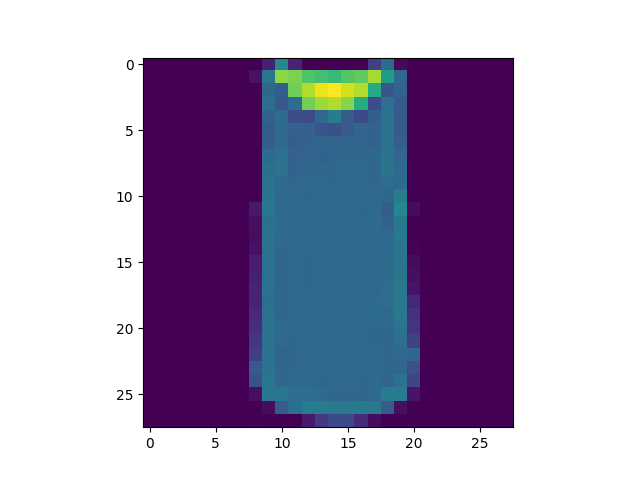

In [14]:
#What's in our data?
plt.imshow(training_images[2])

In [6]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

In [15]:
#Reshape and normalize our images so that they can be fed into a DL Model
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0




In [16]:
#Defining our Model in Keras is Easy! 
model = keras.models.Sequential([
    #1 Convolutional layer to extract data
  keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    #1 Pooling Layer to compress the data
  keras.layers.MaxPooling2D(2, 2),
    #Flatten data layer to make it fit
  keras.layers.Flatten(),
    #Then 1 Dense layer that is actually running our inference
  keras.layers.Dense(128, activation='relu'),
    #And then our final layer of outputs, 1 for each of our fashion categories
  keras.layers.Dense(10, activation='softmax')
])

In [17]:
#Let's look at our model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Evaluate the model on test set, even though we haven't trained it, just to see how it does
score = model.evaluate(test_images, test_labels, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.1165


<IPython.core.display.Javascript object>


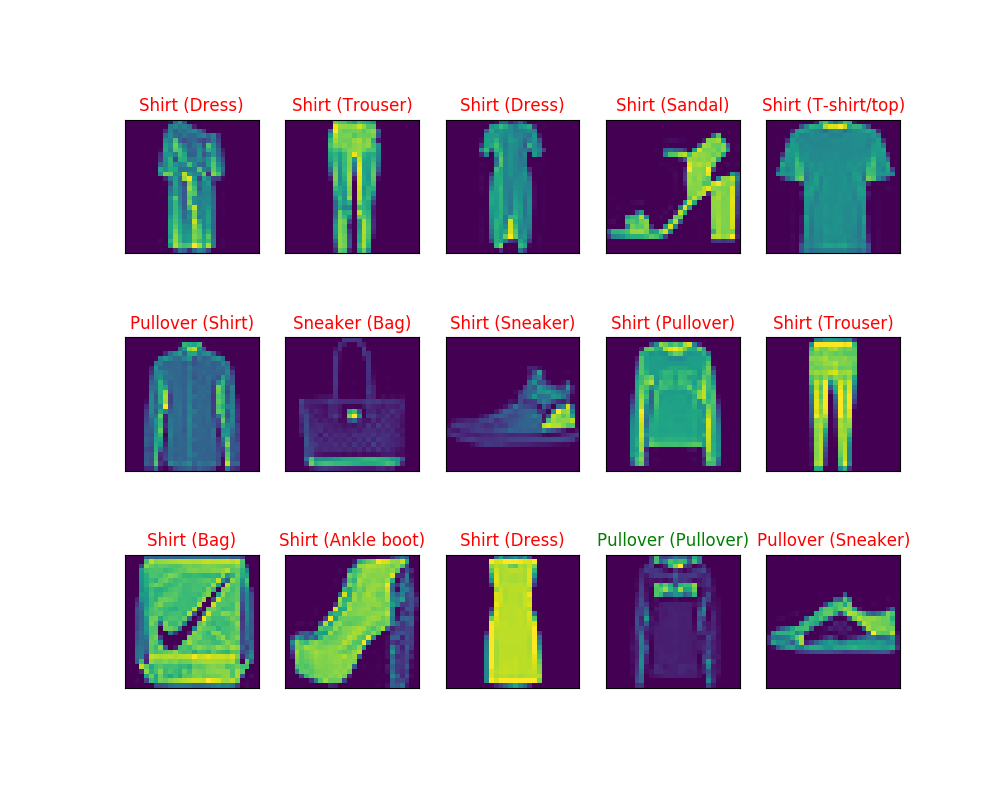

In [19]:
#Let's run our model before training and see how it does
pred_out = model.predict(test_images)
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(10, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_label = np.argmax(pred_out[index])
    true_label = test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_label], 
                                  fashion_mnist_labels[true_label]),
                                  color=("green" if predict_label == true_label else "red"))

In [ ]:
#Now let's train
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
49024/60000 [=======================>......] - ETA: 5s - loss: 0.4084 - acc: 0.8527

In [ ]:
# Evaluate the model on test set again after training
score = model.evaluate(test_images, test_labels, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])

In [ ]:
#Now let's see how our model does
pred_out = model.predict(test_images)
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(10, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_label = np.argmax(pred_out[index])
    true_label = test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_label], 
                                  fashion_mnist_labels[true_label]),
                                  color=("green" if predict_label == true_label else "red"))